In [1]:
import matplotlib.colors as col
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

visualization of neighbor set, parent function

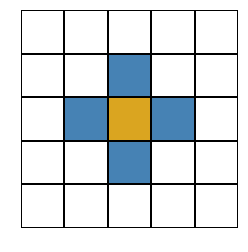

In [282]:
N = 5
data = np.ones((N,N)) * np.nan

data[N//2,N//2] = 0
for j in [-1,0,1]:
    for k in [-1,0,1]:
        if k == j or k == -j:
            continue
        data[N//2 + j, N//2 + k] = 1

    
cmap = col.ListedColormap(['goldenrod','steelblue'])
cmap.set_bad(color='w', alpha=0)
    
fig, ax = plt.subplots(1,1)
ax.axis('off')

for x in range(N+1):
    ax.axhline(x, lw=2, color='k',zorder=5)
    ax.axvline(x, lw=2, color='k',zorder=5)
    
ax.imshow(data, interpolation='none', cmap=cmap, extent=[0,N,0,N], zorder=0, alpha=1)

plt.savefig('neighbor_parent.pdf',dpi=300,bbox_inches='tight')

visualization of agent actions

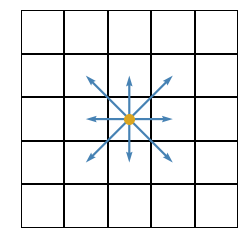

In [2]:
N = 5

fig, ax = plt.subplots(1,1)
ax.axis('off')
ax.axis('square')
ax.set_xlim([0,N])
ax.set_ylim([0,N])

for x in range(N+1):
    ax.axhline(x, lw=2, color='k', zorder=-5)
    ax.axvline(x, lw=2, color='k', zorder=-5)    

ax.plot(N/2,N/2,color='goldenrod',marker='o',markersize=10)

xorig = [N/2]*9
yorig = [N/2]*9
xhead = []
yhead = []

for i in [-1,0,1]:
    for j in [-1,0,1]:
        xhead.append(i)
        yhead.append(j)

plt.quiver(xorig, yorig, xhead, yhead, angles='xy', scale_units='xy', scale=1, width=0.01, color='steelblue', zorder=0)

plt.savefig('agent_act.pdf', dpi=300, bbox_inches='tight')

visualization of agent sensor data

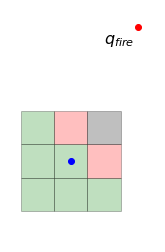

In [6]:
fig, ax = plt.subplots(1,1)
ax.axis('square')
ax.set_xlim([1.5,5.5])
ax.set_ylim([1,7.5])
ax.axis('off')

center = 3
square_pos = []
square_color = ['g','g','g','g','g','r','g','r','k']
for dx in [-1,0,1]:
    for dy in [-1,0,1]:
        square_pos.append((center-0.5+dx,center-0.5+dy))
        
for el,c in zip(square_pos,square_color):
    ax.add_patch(patches.Rectangle(el,1,1,alpha=0.25,edgecolor='k',facecolor=c))
    
ax.plot(5,7,color='red',marker='o')
ax.text(4,6.5,r'$q_{fire}$',fontsize=16)
ax.plot(center,center,color='blue',marker='o')

plt.savefig('agent_sensor_data.jpg',dpi=300,bbox_inches='tight')

visualization of agent communication

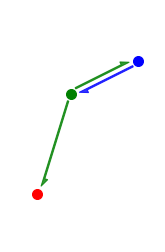

In [24]:
fig, ax = plt.subplots(1,1)
ax.axis('square')
ax.set_xlim([1.5,5.5])
ax.set_ylim([1,7.5])
ax.axis('off')

ax.plot(2,2,color='r',marker='o',markersize=10)
ax.plot(3,5,color='g',marker='o',markersize=10)
ax.plot(5,6,color='b',marker='o',markersize=10)

plt.arrow(3-0.1,5-0.2,-1+0.21,-3+0.44,shape='right',width=0.09,length_includes_head=True,alpha=0.8,ec='g',fc='g',
          head_length=0.25)
plt.arrow(3+0.2-0.05,5+0.1+0.05,2-0.4,1-0.2,shape='right',width=0.09,length_includes_head=True,alpha=0.8,
          ec='g',fc='g',head_length=0.25)
plt.arrow(5-0.2+0.05,6-0.1-0.05,-2+0.4,-1+0.2,shape='right',width=0.09,length_includes_head=True,alpha=0.8,
          ec='b',fc='b',head_length=0.25)

plt.savefig('agent_comm.png',dpi=300,bbox_inches='tight')

visualization of direction vectors

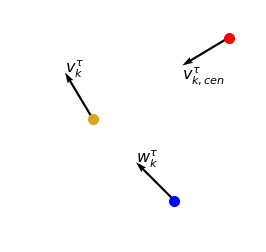

In [5]:
fig, ax = plt.subplots(1,1)
ax.axis('square')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.axis('off')

agent_pos = np.array([-1,0])
fire_pos = np.array([1.5,1.5])
other_pos = np.array([0.5,-1.5])

ax.plot(agent_pos[0],agent_pos[1],color='goldenrod',marker='o',markersize=10)
ax.plot(fire_pos[0],fire_pos[1],color='r',marker='o',markersize=10)
ax.plot(other_pos[0],other_pos[1],color='b',marker='o',markersize=10)

v_cen = (agent_pos - fire_pos) / np.linalg.norm(agent_pos - fire_pos)
v_perp = np.array([v_cen[1],-v_cen[0]])
v_oth = (agent_pos - other_pos) / np.linalg.norm(agent_pos - other_pos)

plt.quiver(fire_pos[0],fire_pos[1],v_cen[0],v_cen[1], angles='xy', scale_units='xy', scale=1, width=0.01)
plt.quiver(agent_pos[0],agent_pos[1],v_perp[0],v_perp[1], angles='xy', scale_units='xy', scale=1, width=0.01)
plt.quiver(other_pos[0],other_pos[1],v_oth[0],v_oth[1], angles='xy', scale_units='xy', scale=1, width=0.01)

ax.text(fire_pos[0]+v_cen[0],fire_pos[1]+v_cen[1]-0.25,r'$v^{\tau}_{k,cen}$',fontsize=16)
ax.text(agent_pos[0]+v_perp[0],agent_pos[1]+v_perp[1],r'$v^{\tau}_{k}$',fontsize=16)
ax.text(other_pos[0]+v_oth[0],other_pos[1]+v_oth[1],r'$w_{k}^{\tau}$',fontsize=16)

plt.savefig('direction_vectors.png',dpi=300,bbox_inches='tight')

visualization of left and right actions

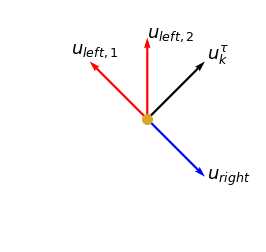

In [4]:
fig, ax = plt.subplots(1,1)
ax.axis('square')
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])
ax.axis('off')

agent_pos = np.array([0,0])
act = np.array([np.sqrt(2)/2,np.sqrt(2)/2])
# act = np.array([1,0])
left1 = np.array([-act[1],act[0]])
left2 = np.array([act[0]-act[1],act[0]+act[1]]) / max([np.linalg.norm(np.array([act[0]-act[1],act[0]+act[1]])),1])
# left2 = np.array([act[0]-act[1],act[0]+act[1]]) / max([np.abs(act[0]-act[1]),np.abs(act[0]+act[1]),1])
right = np.array([act[1],-act[0]])

ax.plot(agent_pos[0],agent_pos[1],color='goldenrod',marker='o',markersize=10)

plt.quiver(agent_pos[0],agent_pos[1],act[0],act[1], angles='xy',scale_units='xy',scale=1/1.5,width=0.01)
plt.quiver(agent_pos[0],agent_pos[1],left1[0],left1[1], angles='xy',scale_units='xy',scale=1/1.5,width=0.01,color='r')
plt.quiver(agent_pos[0],agent_pos[1],left2[0],left2[1], angles='xy',scale_units='xy',scale=1/1.5,width=0.01,color='r')
plt.quiver(agent_pos[0],agent_pos[1],right[0],right[1], angles='xy',scale_units='xy',scale=1/1.5,width=0.01,color='b')

ax.text(agent_pos[0]+act[0]+0.4,agent_pos[0]+act[1]+0.4,r'$u_{k}^{\tau}$',fontsize=18)
ax.text(agent_pos[0]+left1[0]-0.7,agent_pos[0]+left1[1]+0.5,r'$u_{left,1}$',fontsize=18)
ax.text(agent_pos[0]+left2[0],agent_pos[1]+left2[1]+0.5,r'$u_{left,2}$',fontsize=18)
ax.text(agent_pos[0]+right[0]+0.4,agent_pos[1]+right[1]-0.4,r'$u_{right}$',fontsize=18)

plt.savefig('left_right.png',dpi=300,bbox_inches='tight')